<div class="alert alert-block alert-info" style="margin-left: 10%">
    <h1>  Financial exploratory data analysis for index funds (ETF)</h1>
 </div>


In this notebook, we will explore the financial market data. In particular, ten index funds performance for the past ten years, 2010 to 2019. The following index funds are randomly selected with two parameters;  the price set to descending, and IPO at least ten years or more ago.

**DISCLAIMER:** This is not financial advice, past performance is not indicative of future results. You should not rely on analysis for any investment decision.

### Data  Acquisition
The financial data required for this notebook was acquired directly from yahoo finance using pandas datareader. Focused on the period starting from January 1st, 2010 until December 31, 2019, which is ten years as previously maintained.
The table below should provide a high-level overview of the asset, further information can be found on yahoo, google finance or any of your preferred financial platforms by searching the ticker.



|Ticker|Company |Category|Name |
|--- |--- |---|---|
|IHI|iShares|Health |iShares U.S. Medical Devices ETF|
|ITA|iShares|Industrials |iShares U.S. Aerospace & Defense ETF |
|IYC |iShare |Consumer Cyclical|iShares U.S. Consumer Services ETF|
|VOO|Vanguard|Large Blend |iShares Expanded Tech Sector ETF |
|VBK |Vanguard|Small Growth |Vanguard Small-Cap Index Fund ETF|
|VGT|Vanguard |Technology|Vanguard Information Technology Index Fund ETF|
|RYH |Invesco |Health|Invesco S&P 500 Equal Weight Health Care ETF|
|IGM|Principal Funds|Corporate Bond |Principal Investment Grade Corporate Active ETF |
|MDY|SPDR State Street Global Advisors|Mid-Cap Blend |SPDR S&P MIDCAP 400 ETF Trust |
|ONEQ|Fidelity Investments|Large Growth |Fidelity NASDAQ Composite Index Tracking Stock Fund |





In [65]:
# !pip install pandas-datareader

### importing the necessary dependencies for this analysis

In [66]:
# libraries for handling data
from pandas_datareader import data, wb
import pandas as pd 
import numpy as np 
import datetime

# libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# interactive visualization tool
import plotly
import cufflinks as cf
cf.go_offline()

###  Setting start and end date

In [67]:
start =datetime.datetime(2010,1,1)
end =datetime.datetime(2019,12,31)

### Setting stock ticker, source, start and end date

|Ticker|Source |Start date|End date |
|--- |--- |---|---|
|ETF ticker|yahoo finance|January 1st, 2010 |December 31, 2019|

In [68]:
#Google finance doesn’t provide common index data download. The Stooq site has the data
IGM = data.DataReader('IGM','yahoo', start, end)
IHI = data.DataReader('IHI','yahoo', start, end)
IYC = data.DataReader('IYC','yahoo', start, end)
IYW = data.DataReader('IYW','yahoo', start, end)
MDY = data.DataReader('MDY','yahoo', start, end)
ONEQ = data.DataReader('ONEQ','yahoo', start, end)
RYH = data.DataReader('RYH','yahoo', start, end)
VBK = data.DataReader('VBK','yahoo', start, end)
VGT = data.DataReader('VGT','yahoo', start, end)
VOO = data.DataReader('VOO','yahoo', start, end)


### Creating list of tickers using the tickers above

In [69]:
tickers = ['IGM','IHI','IYC','IYW','MDY','ONEQ','RYH','VBK','VGT','VOO']

### Concatenate the all the ten index fund into one
Now that we have each index fund loaded, we are going to use pandas pd.concat to concatenate the all the ten index fund dataframes together to a single data frame called funds.

In [70]:
funds = pd.concat([IGM,IHI,IYC,IYW,MDY,ONEQ,RYH,VBK,VGT,VOO], axis=1,keys=tickers)

In [71]:
# check the new list
funds.head()

IGM                                                       \
                 High        Low       Open      Close   Volume  Adj Close   
Date                                                                         
2010-01-04  55.130001  54.660000  54.860001  54.990002  45100.0  51.147377   
2010-01-05  55.119999  54.630001  55.009998  54.980000  55800.0  51.138092   
2010-01-06  55.020000  54.430000  54.959999  54.549999  97200.0  50.738136   
2010-01-07  54.529999  54.090000  54.480000  54.299999  44800.0  50.505615   
2010-01-08  54.790001  54.099998  54.169998  54.770000  66000.0  50.942760   

                  IHI                                   ...        VGT  \
                 High        Low       Open      Close  ...       Open   
Date                                                    ...              
2010-01-04  53.630001  53.310001  53.599998  53.480000  ...  55.549999   
2010-01-05  53.830002  53.380001  53.380001  53.779999  ...  55.810001   
2010-01-06  54.450001  53.799999  53.799999  54.389999  ...  55.759998   
2010-01-07  54.639999  54.299999  54.340000  54.630001  ...  55.290001   
2010-01-08  54.689999  54.450001  54.529999  54.689999  ...  54.970001   

                                            VOO                        \
                Close    Volume  Adj Close High Low Open Close Volume   
Date                                                                    
2010-01-04  55.799999  270600.0  49.968803  NaN NaN  NaN   NaN    NaN   
2010-01-05  55.740002  520800.0  49.915070  NaN NaN  NaN   NaN    NaN   
2010-01-06  55.349998  223000.0  49.565826  NaN NaN  NaN   NaN    NaN   
2010-01-07  55.139999  237100.0  49.377769  NaN NaN  NaN   NaN    NaN   
2010-01-08  55.570000  168900.0  49.762840  NaN NaN  NaN   NaN    NaN   

                      
           Adj Close  
Date                  
2010-01-04       NaN  
2010-01-05       NaN  
2010-01-06       NaN  
2010-01-07       NaN  
2010-01-08       NaN  

[5 rows x 60 columns]

In [72]:
funds.columns.names = ['funds Ticker','Stock Info']

## Exploratory data analysis (EDA)
Now lets explore the data a bit.  
What's the maximum closing price for the period Jan 1st,2010 - Dec 31st, 2019?

In [73]:
funds.xs(key='Close', axis=1, level='Stock Info').max()

funds Ticker
IGM     243.979996
IHI     265.670013
IYC     229.889999
IYW     233.990005
MDY     376.089996
ONEQ    351.309998
RYH     222.559998
VBK     199.809998
VGT     245.729996
VOO     296.670013
dtype: float64

What's the minimum closing price for the period Jan 1st,2010 - Dec 31st, 2019?

In [74]:
funds.xs(key='Close', axis=1, level='Stock Info').min()

funds Ticker
IGM      48.020000
IHI      47.869999
IYC      53.299999
IYW      51.259998
MDY     125.760002
ONEQ     82.220001
RYH      52.299999
VBK      56.500000
VGT      49.130001
VOO     100.339996
dtype: float64

Create an empty DataFrame for returns called returns. This dataframe will contain the returns for each index fund. returns are typically defined by:

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [75]:
returns =pd.DataFrame()

Let's use pandas pct_change() method on the Close column to create a column for return value. Create a for loop that goes thruogh each ETF Ticker creates this returns column and set's it as a column in the returns DataFrame.

In [76]:
for tick in tickers:
    returns[tick+' Return'] = funds[tick]['Close'].pct_change()
    
returns.head()

,IGM Return,IHI Return,IYC Return,IYW Return,MDY Return,ONEQ Return,RYH Return,VBK Return,VGT Return,VOO Return
Date,,,,,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,-0.000182,0.005610,0.001788,-0.001539,0.002538,0.000880,-0.001735,0.005067,-0.001075,NaN
2010-01-06,-0.007821,0.011343,-0.001607,-0.007021,0.005436,-0.004944,0.003477,0.002927,-0.006997,NaN
2010-01-07,-0.004583,0.004413,0.007152,-0.003794,0.004740,0.000331,0.006237,0.003081,-0.003794,NaN
2010-01-08,0.008656,0.001098,-0.000355,0.007616,0.006266,0.007726,0.002927,0.005820,0.007798,NaN


### Let's create a pairplot to visualize returns using seaborn.

/opt/conda/envs/Python36/lib/python3.6/site-packages/numpy/lib/histograms.py:754: RuntimeWarning:

invalid value encountered in greater_equal

/opt/conda/envs/Python36/lib/python3.6/site-packages/numpy/lib/histograms.py:755: RuntimeWarning:

invalid value encountered in less_equal



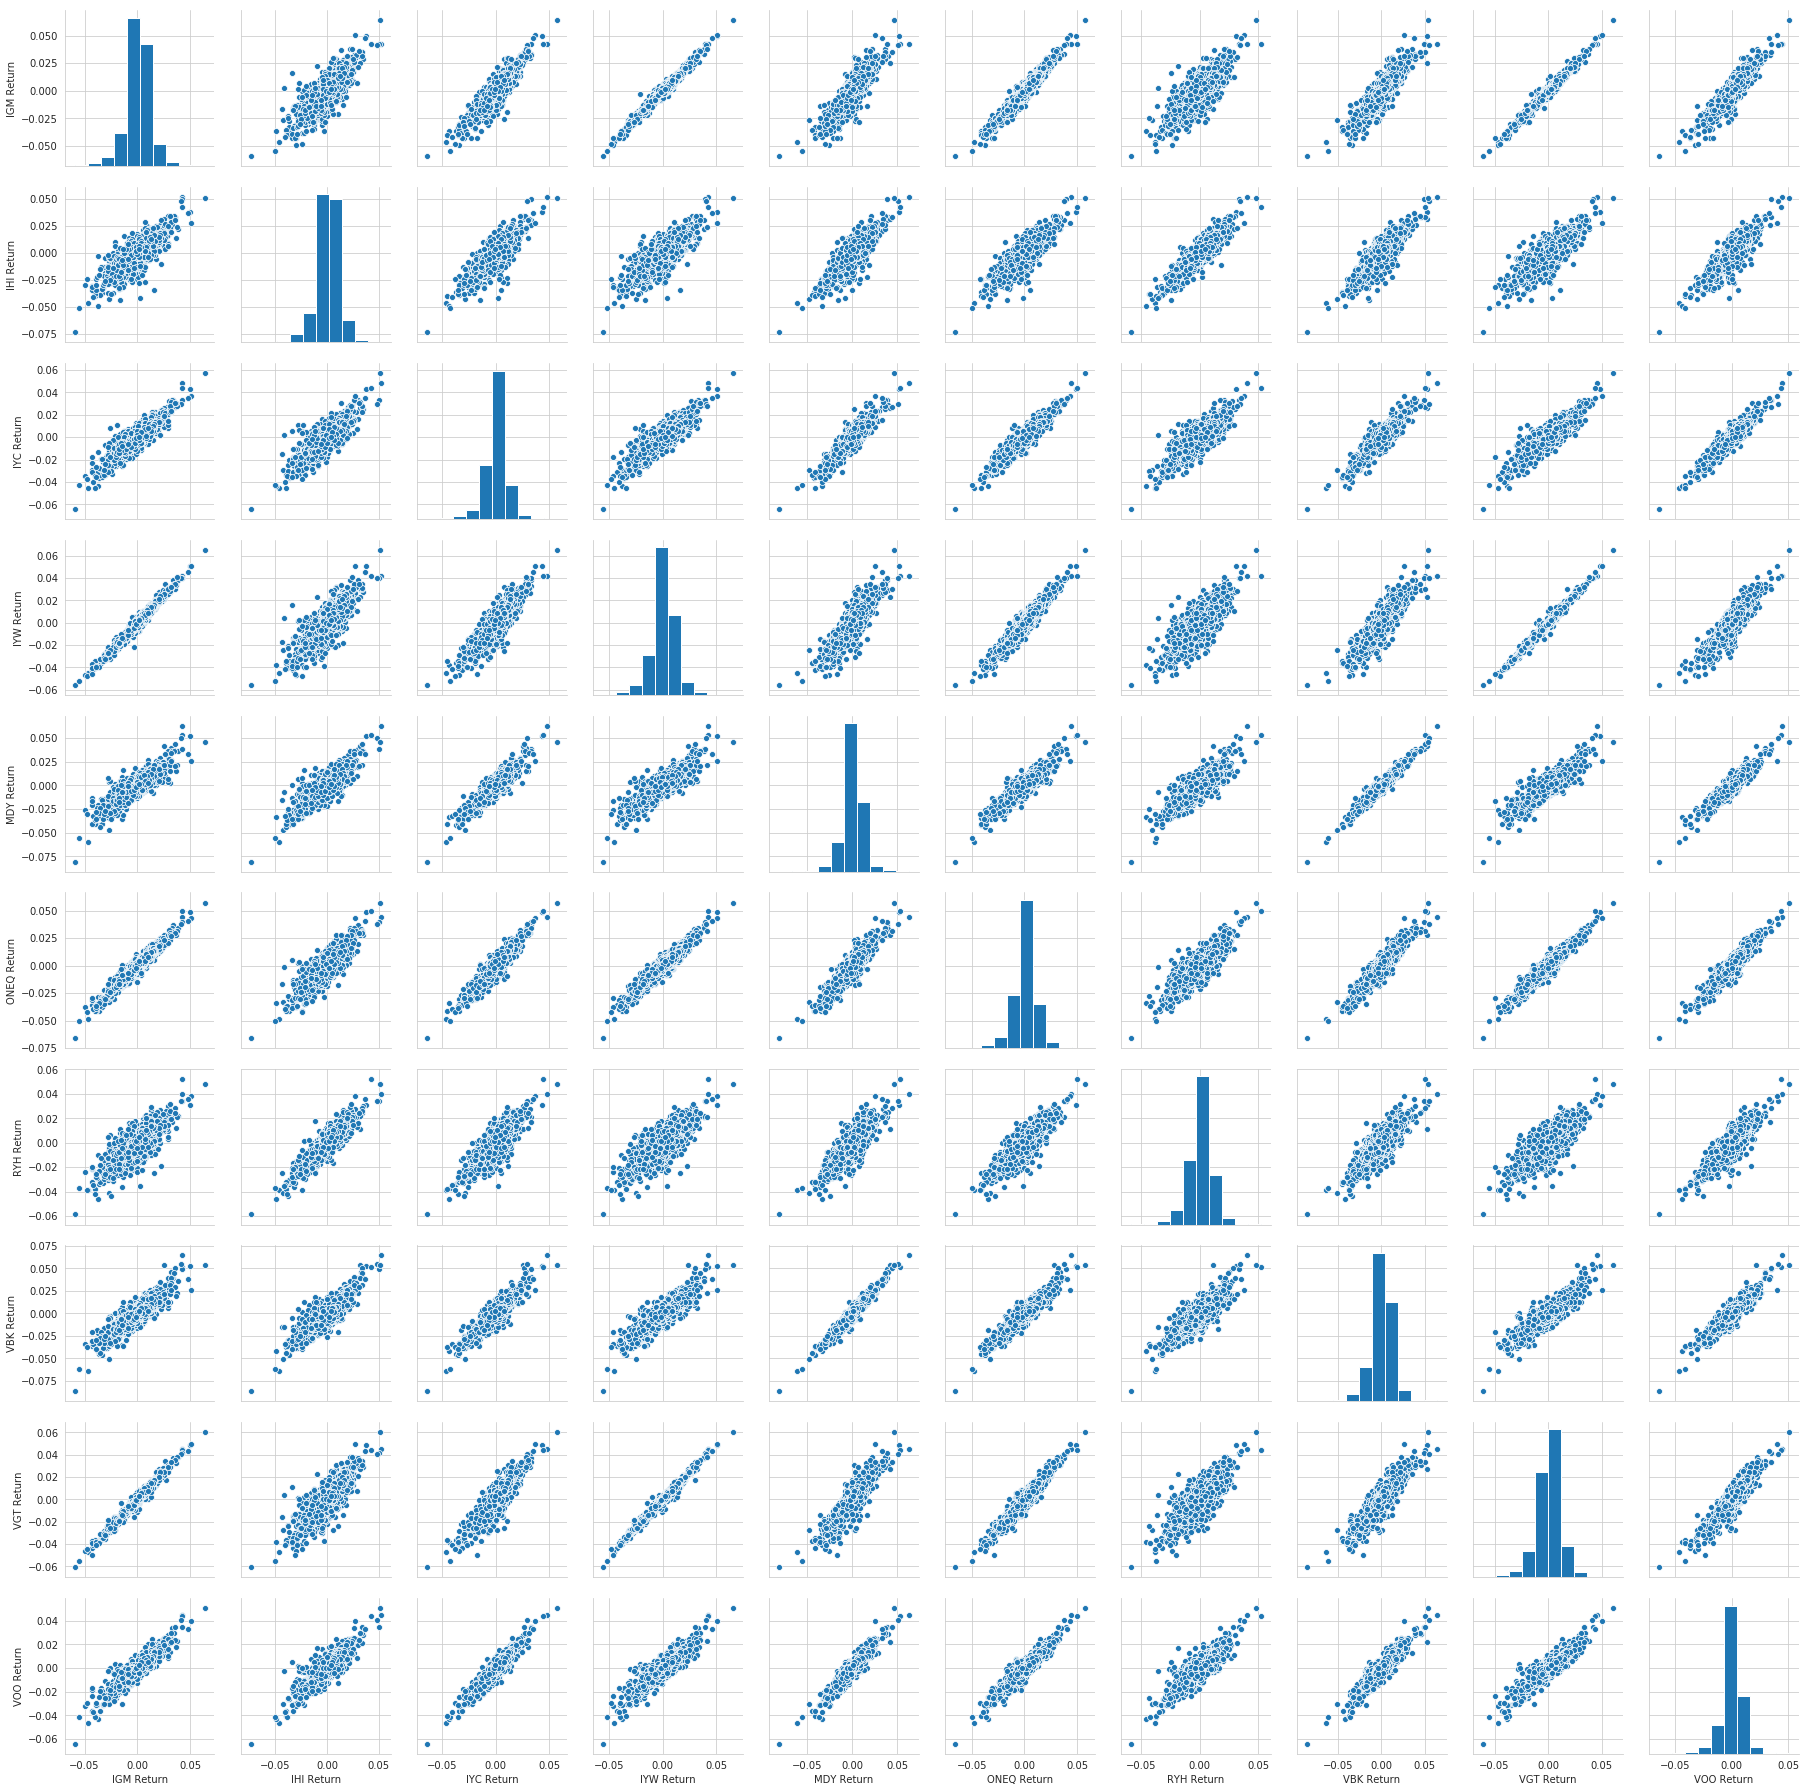

In [77]:
sns.pairplot(returns[1:])

### Best and worse single day return
Previously, we run what the max and min closing price were for each index fund for the period Jan 1st,2010 - Dec 31st, 2019.
In the following two cells, let's find out when the best and the worse single day return happened.  

In [78]:
returns.idxmin()

IGM Return    2011-08-08
IHI Return    2011-08-08
IYC Return    2011-08-08
IYW Return    2011-08-08
MDY Return    2011-08-08
ONEQ Return   2011-08-08
RYH Return    2011-08-08
VBK Return    2011-08-08
VGT Return    2011-08-08
VOO Return    2011-08-08
dtype: datetime64[ns]

As you may have noticed they all seem to have had single worse day on 2011-08-08, a quick google search reveals there was a stock market crashed
what's referred to as [Black Friday 2011](https://en.wikipedia.org/wiki/Black_Monday_(2011)). Check the link for more information.

In [79]:
returns.idxmax()

IGM Return    2018-12-26
IHI Return    2011-08-09
IYC Return    2018-12-26
IYW Return    2018-12-26
MDY Return    2011-08-09
ONEQ Return   2018-12-26
RYH Return    2011-08-11
VBK Return    2011-08-09
VGT Return    2018-12-26
VOO Return    2018-12-26
dtype: datetime64[ns]

Let's run the standard deviation on returns, to evaluate the overall risk level for the time frame.

In [80]:
returns.std()

IGM Return     0.011322
IHI Return     0.010750
IYC Return     0.009566
IYW Return     0.011447
MDY Return     0.010678
ONEQ Return    0.010633
RYH Return     0.009843
VBK Return     0.011920
VGT Return     0.011289
VOO Return     0.008977
dtype: float64

Which would are the riskiest for the year 2015?

In [81]:
returns.ix['2015-01-01':'2015-12-31'].std()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



IGM Return     0.011166
IHI Return     0.010444
IYC Return     0.009963
IYW Return     0.011733
MDY Return     0.009527
ONEQ Return    0.010543
RYH Return     0.011071
VBK Return     0.010153
VGT Return     0.011183
VOO Return     0.009775
dtype: float64

** While the above results are very close to each other, MDY, VOO, and IYC appear slightly less risky. **

###  Distribution plot for return VOO in 2015 (iShares Expanded Tech Sector ETF)  

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



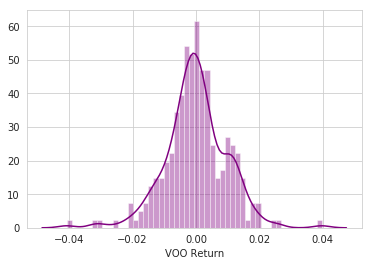

In [82]:
sns.distplot(returns.ix['2015-01-01':'2015-12-31']['VOO Return'],color='purple',bins=50)

As you can see, we have stable distribution with percent deviating 0.4

### ONEQ Return 2016
let's repeat the above, this time for ONEQ  2016

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



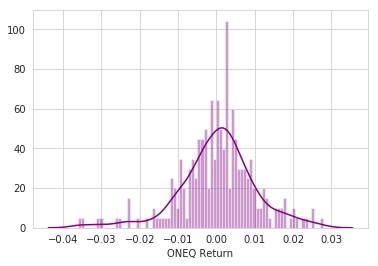

In [83]:
sns.distplot(returns.ix['2016-01-01':'2016-12-31']['ONEQ Return'],color='purple',bins=80)

## Visualization using plotly and cufflinks to make interactive plots

#### Closeing price for each ETF

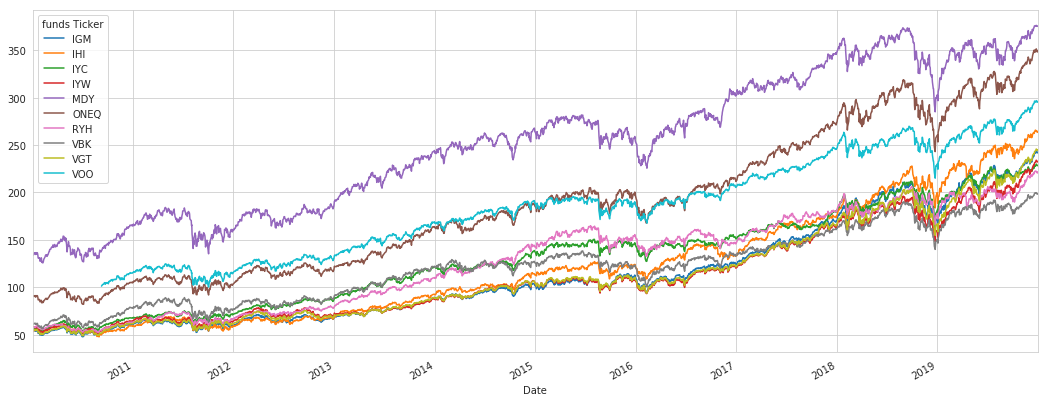

In [98]:
for tick in tickers:
    funds[tick]['Close'].plot(label=tick,figsize=(18,7))
    
plt.legend(title="funds Ticker")

# same result as above
# funds.xs(key='Close',axis=1, level='Stock Info').plot(label=tick,figsize=(16,5))

#### same as above but nteractive.

In [86]:
funds.xs(key='Close',axis=1, level='Stock Info').iplot()

## Moving Averages

Since this is a stock market asset, let's plot moving averages for these stocks in the year 2017.  
VOO 30 day moving averages aganist closing price.

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



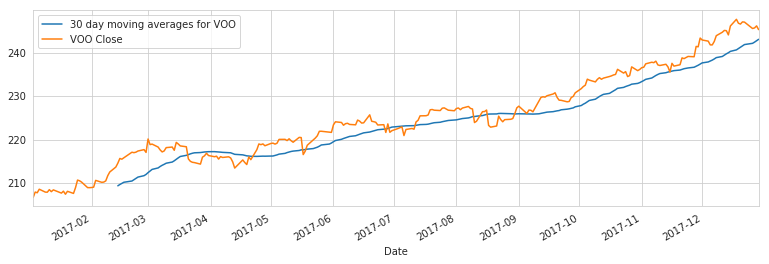

In [101]:
VOO['Close'].ix['2017-01-01':'2018-01-01'].rolling(window=30).mean().plot(figsize=(13,4),label='30 day moving averages for VOO')
VOO['Close'].ix['2017-01-01':'2018-01-01'].plot(label='VOO Close')
plt.legend()

#### Heatmap of the correlation between the stocks Close Price.

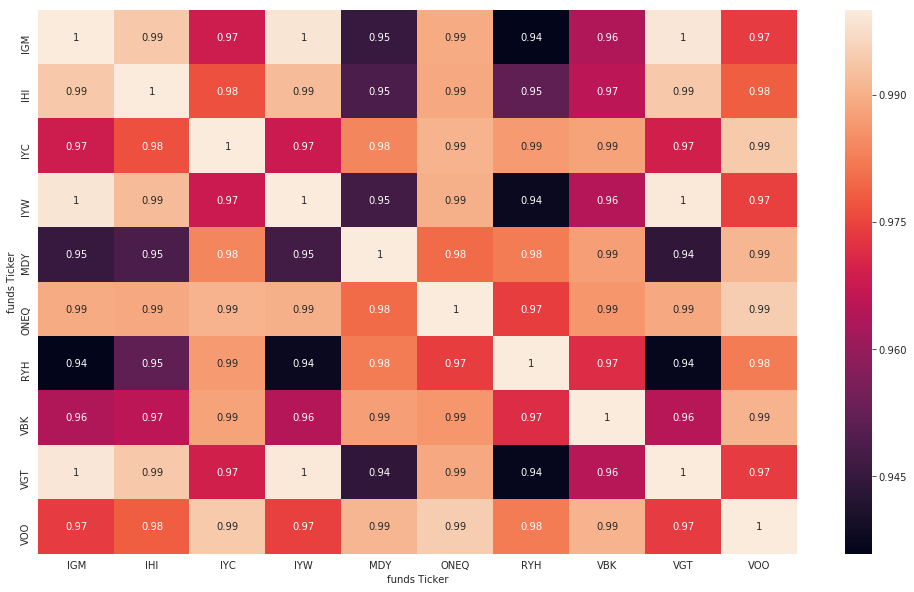

In [109]:
plt.figure(figsize=(17,10))
sns.heatmap(funds.xs(key='Close', axis=1, level='Stock Info').corr(),annot=True)

#### Clustermap to cluster the correlations together.

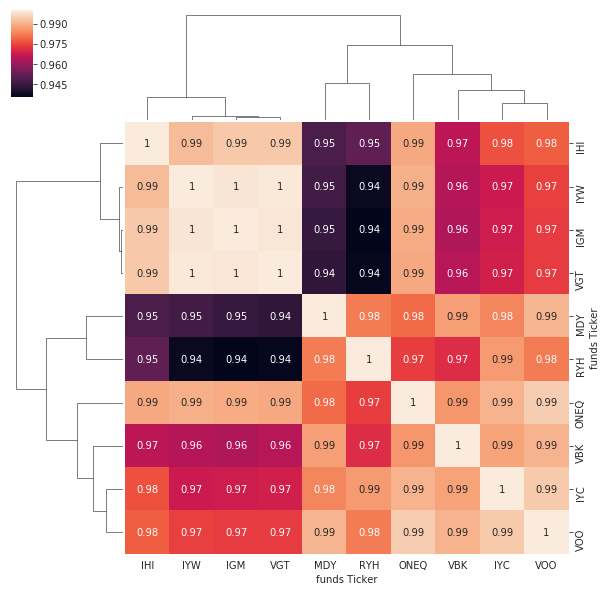

In [111]:
sns.clustermap(funds.xs(key='Close', axis=1, level='Stock Info').corr(),annot=True)

### Technical Analysis plots
#### Now let's create a interactive candle stick plot using cufflinks

In [120]:
sq18 = IGM[['Open','High','Low','Close']].ix['2017-01-01':'2017-12-31']
sq18.iplot(kind='candle')


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



### Technical Analysis plots 
Using ta_plot() let's add simple moving avarages (SMA) and bollinger band.  

In [118]:
VBK['Close'].ix['2019-01-01':'2019-12-31'].ta_plot(study='sma',periods=[13,21,55])

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



In [119]:
VBK['Close'].ix['2019-01-01':'2019-12-31'].ta_plot(study='boll',periods=[7,12,21])

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated

